## Ejercicio
Escribir un programa que almacene la cadena `¡Hola Mundo!` en una variable y luego muestre por pantalla el contenido de la variable.

## Solución

# Nueva sección

In [ ]:
mensaje = "¡Hola Mundo!"
print(mensaje)

¡Hola Mundo!


[[49.   51.   57.   47.   54.   56.   59.   53.   58.   52.   75.   80.
  75.   65.   75.   77.   65.   70.   78.   70.  ]
 [ 1.43  1.55  1.58  1.55  1.6   1.58  1.64  1.61  1.63  1.6   1.73  1.75
   1.69  1.71  1.79  1.76  1.71  1.7   1.81  1.67]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


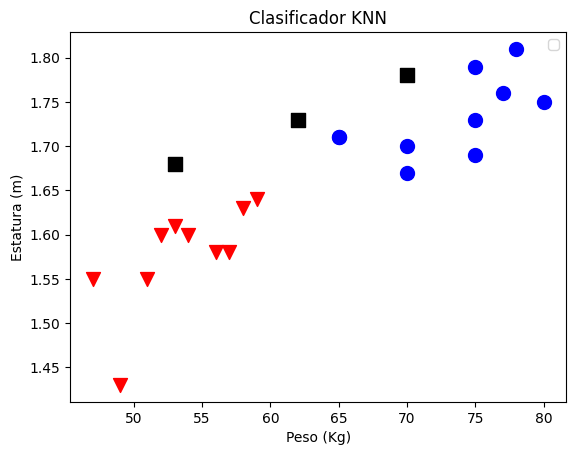

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([[49],[1.43]])
x2 = np.array([[51],[1.55]])
x3 = np.array([[57],[1.58]])
x4 = np.array([[47],[1.55]])
x5 = np.array([[54],[1.60]])
x6 = np.array([[56],[1.58]])
x7 = np.array([[59],[1.64]])
x8 = np.array([[53],[1.61]])
x9 = np.array([[58],[1.63]])
x10 = np.array([[52],[1.60]])
x11 = np.array([[75],[1.73]])
x12 = np.array([[80],[1.75]])
x13 = np.array([[75],[1.69]])
x14 = np.array([[65],[1.71]])
x15 = np.array([[75],[1.79]])
x16 = np.array([[77],[1.76]])
x17 = np.array([[65],[1.71]])
x18 = np.array([[70],[1.70]])
x19 = np.array([[78],[1.81]])
x20 = np.array([[70],[1.67]])

c0 = np.zeros(10)
c1 = np.ones(10)

X = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20), axis=1)
C = np.concatenate((c0,c1), axis=0)
C = np.uint8(C)
print(X)
print(C)

y1 = np.array([[62], [1.73]])
y2 = np.array([[70], [1.78]])
y3 = np.array([[53], [1.68]])
Y = np.concatenate((y1,y2,y3), axis=1)

for i in range(X.shape[1]):
    if C[i] == 0:
        marcar = 'v'
        color = 'red'
    else:
        marcar = 'o'
        color = 'blue'
    plt.scatter(x=X[0,i], y=X[1,i], c=color, s=100, marker=marcar)


for j in range(Y.shape[1]):
    plt.scatter(x=Y[0,j], y=Y[1,j], c='black', s=100, marker='s')


plt.xlabel('Peso (Kg)')
plt.ylabel('Estatura (m)')
plt.title('Clasificador KNN')
plt.legend()

#clasificador = KNN(k=3)

<ipython-input-2-f9dad6e1af53>:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


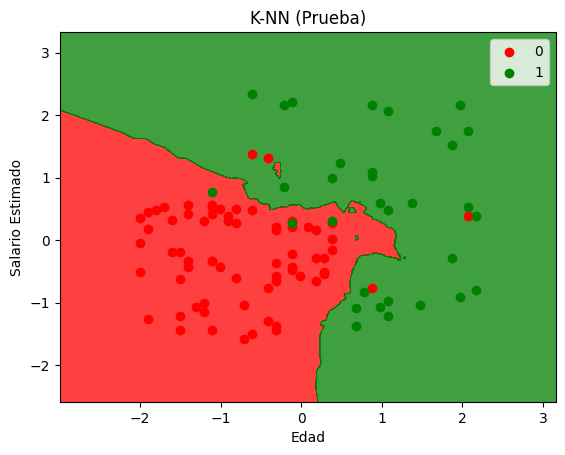

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    random_state = 0)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = KNeighborsClassifier(n_neighbors=5,
                                  metric= 'minkowski',
                                  p = 2)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()
